# Notebook 14
# 04/09/25
# EESC BC3050
## Matthew-David Ilomuanya

## Question 1

In [1]:
# Reading in libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib ipympl

import netCDF4

import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point

import datetime

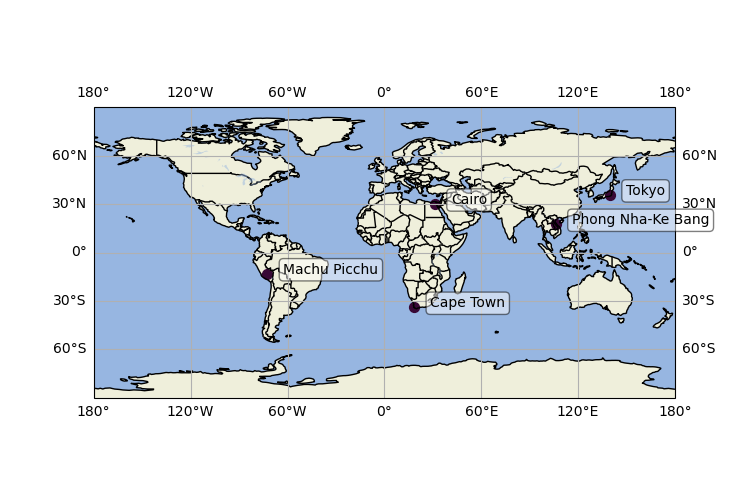

In [2]:
file1 = 'NB_14_Locations.xlsx'
locations = pd.read_excel(file1)

props=dict(boxstyle='round',facecolor='white',alpha=0.5)

fig,ax=plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()})
fig.set_size_inches(7.5,5)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

ax.gridlines(draw_labels=True)
ax.scatter(locations.Longitude,locations.Latitude,color='xkcd:eggplant'
           ,transform=ccrs.PlateCarree(),s=50)

for idx,dfR in locations.iterrows():
    ax.text(dfR['Longitude']+10,dfR['Latitude'],dfR['Location'],transform=ccrs.PlateCarree(),bbox=props)
ax.set_global()

## ***Figure 1***
This is a figure plotting the five locations on Earth that I would most like to visit

## Question 2

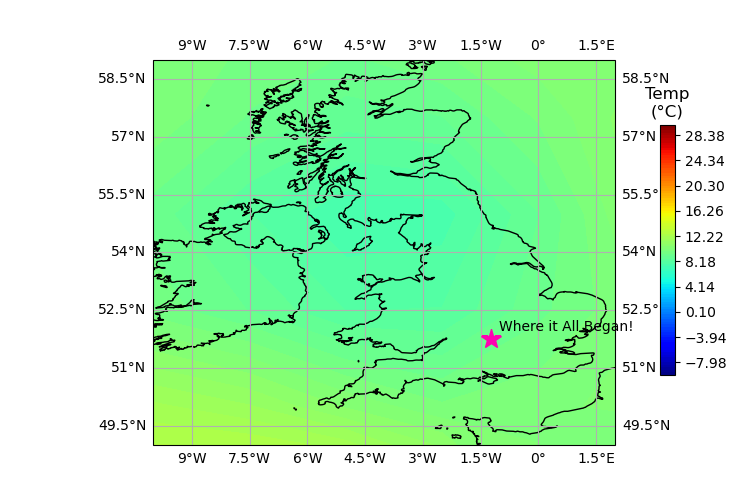

In [14]:
file = 'compday.zHyLz74iGk.nc'
f = netCDF4.Dataset(file)

lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
air = f.variables['air'][:]  # Assuming dimensions are time, lat, lon
time = f.variables['time'][:]

# Convert from Kelvin to Celsius
air = air - 273.15

# Create figure and map centered on the UK
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(7.5, 5)

# Add map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.gridlines(draw_labels=True)

# Set map extent to focus on UK (centered around Oxford)
ax.set_extent([-10, 2, 49, 59])  # [lon_min, lon_max, lat_min, lat_max]

# Add cyclic point for smooth wrapping of data
data, lonW = add_cyclic_point(air[0], coord=lon)

# Contour plot
cmap = 'jet'
levels = np.linspace(-10, 30, 100)  # Celsius range

air_contour = ax.contourf(
    lonW, lat, data,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    levels=levels
)

# Add a star marker for birthplace
birth_lat = 51.7644
birth_lon = -1.2189

ax.plot(
    birth_lon, birth_lat,
    marker='*',
    color='xkcd:bright pink',
    markersize=15,
    transform=ccrs.PlateCarree(),
    zorder=10,
    label='My Birthplace'
)

#Add label next to star
ax.text(
    birth_lon + 0.2, birth_lat + 0.2,
    'Where it All Began!',
    transform=ccrs.PlateCarree(),
    fontsize=10,
    color='black',
    zorder=10
)

# Colorbar in Celsius
cbar_ax = fig.add_axes([0.88, 0.25, 0.02, 0.5])  # manually positioned axis
cbar = fig.colorbar(air_contour, cax=cbar_ax)
cbar.ax.set_title('Temp\n(\N{DEGREE SIGN}C)')

plt.show()

## ***Figure 2***
This is a figure showing the temperature (°C) on the day that I was born, in Oxford, UK the city I was born